<a href="https://colab.research.google.com/github/mlcafe/Pengenalan-ML/blob/master/2_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=0)


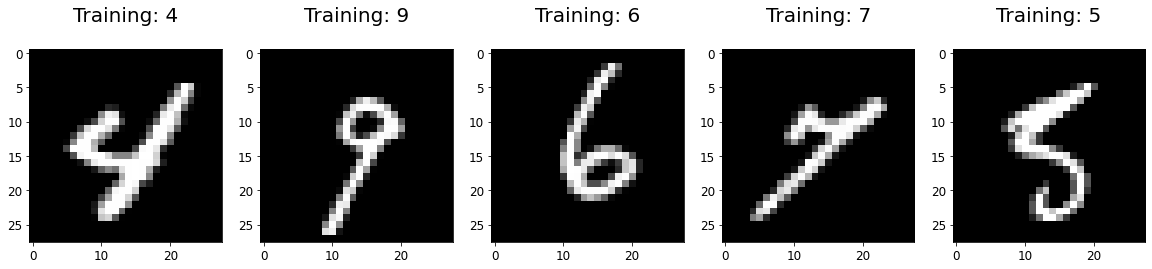

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % int(label), fontsize = 20)

In [ ]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(solver = 'lbfgs')
logReg.fit(train_img, train_lbl)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logReg.predict(test_img)
from sklearn.metrics import accuracy_score
accuracy_score(test_lbl, predictions)

0.9172142857142858

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_lbl, predictions)

array([[1348,    0,    3,    2,    2,   11,   14,    1,    6,    0],
       [   0, 1541,    6,    5,    2,    4,    1,    5,   14,    2],
       [   6,   17, 1294,   19,   20,    4,   16,   13,   50,    4],
       [   5,    5,   50, 1261,    1,   43,    4,   13,   39,   14],
       [   2,    4,    9,    2, 1259,    2,   15,   11,    6,   40],
       [  11,    5,   12,   46,   13, 1053,   22,    7,   49,   13],
       [  13,    5,   14,    1,   16,   20, 1310,    3,    5,    0],
       [   3,    6,   21,    6,   15,    1,    1, 1347,    7,   51],
       [   4,   34,   11,   31,    9,   38,   16,    2, 1210,   13],
       [   4,    4,   10,   16,   49,    7,    1,   39,   13, 1218]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report

print(classification_report(test_lbl, predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1387
           1       0.95      0.98      0.96      1580
           2       0.90      0.90      0.90      1443
           3       0.91      0.88      0.89      1435
           4       0.91      0.93      0.92      1350
           5       0.89      0.86      0.87      1231
           6       0.94      0.94      0.94      1387
           7       0.93      0.92      0.93      1458
           8       0.86      0.88      0.87      1368
           9       0.90      0.89      0.90      1361

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



In [ ]:
from sklearn.metrics import roc_auc_score

probs = logReg.predict_proba(test_img)
roc_auc_score(test_lbl, probs, multi_class='ovo')

0.9926104815329229

In [ ]:
!pip install scikit-plot

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


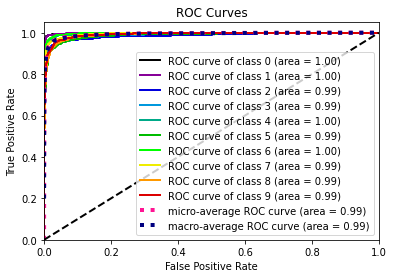

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(test_lbl, probs)
plt.show()